Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 224 images belonging to 3 classes.
Found 139 images belonging to 3 classes.
Epoch 1/20
7/7 [==============================] - 62s 8s/step - loss: 27.1852 - accuracy: 0.3584 - val_loss: 2.2740 - val_accuracy: 0.5324
Epoch 2/20
7/7 [==============================] - 49s 7s/step - loss: 2.2339 - accuracy: 0.5540 - val_loss: 1.2305 - val_accuracy: 0.4101
Epoch 3/20
7/7 [==============================] - 49s 7s/step - loss: 0.8312 - accuracy: 0.6942 - val_loss: 0.8804 - val_accuracy: 0.5683
Epoch 4/20
7/7 [==============================] - 53s 8s/step - loss: 0.5217 - accuracy: 0.7745 - val_loss: 0.7161 - val_accuracy: 0.7482
Epoch 5/20
7/7 [==============================] - 49s 7s/step - loss: 0.6044 - accuracy: 0.7840 - val_loss: 0.6838 - val_accuracy: 0.7266
Epoch 6/20
7/7 [==============================] - 53s 8s/step - loss: 0.3687 - accuracy: 0.8686 - 

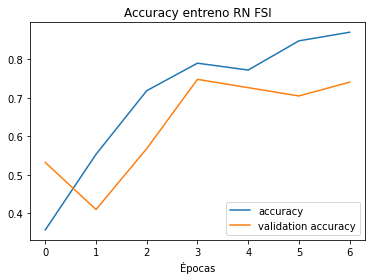

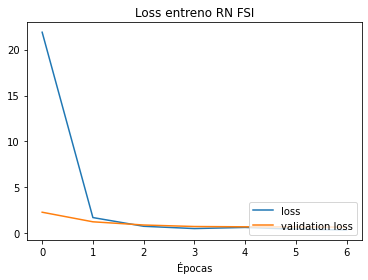

In [7]:
from google.colab import drive
drive.mount('/content/drive')
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping
import keras
from time import time

K.clear_session()


clases = 3

directorio_entrenamiento  = '/content/drive/My Drive/data2/entrenamiento/'
directorio_validacion  = '/content/drive/My Drive/data2/validacion/'

datagen_entrenamiento = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.1,
        horizontal_flip=True
)

datagen_validacion = ImageDataGenerator(
        rescale=1./255
)

generador_entrenamiento = datagen_entrenamiento.flow_from_directory(
        directorio_entrenamiento,
        target_size=(350, 350),
        batch_size=32,
        class_mode='categorical')

generador_validacion = datagen_validacion.flow_from_directory(
        directorio_validacion,
        target_size=(350, 350),
        batch_size=32,
        class_mode='categorical')

red_neuronal = Sequential()
red_neuronal.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(350, 350, 3)))
red_neuronal.add(MaxPooling2D(pool_size=(2, 2)))

red_neuronal.add(Conv2D(64, (3, 3), activation='relu'))
red_neuronal.add(MaxPooling2D(pool_size=(2, 2)))

red_neuronal.add(Dropout(0.25))
red_neuronal.add(Flatten())
red_neuronal.add(Dense(256, activation='relu'))

red_neuronal.add(Dropout(0.5))
red_neuronal.add(Dense(clases, activation='softmax'))

red_neuronal.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
epocas = 20

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3, restore_best_weights=True)

history = red_neuronal.fit(
        generador_entrenamiento,
        epochs=epocas,
        steps_per_epoch=7,
        validation_data = generador_validacion,
        callbacks = [es]
)

red_neuronal.save("/content/drive/My Drive/data2/redneuronal.h5")


from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

plt.title('Accuracy entreno RN FSI')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()

from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.title('Loss entreno RN FSI')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()

In [6]:
import numpy as np
from keras_preprocessing.image import  load_img, img_to_array
from keras.models import  load_model

cnn=load_model('/content/drive/My Drive/data2/redneuronal.h5')

def predict(file):
  x=load_img(file, target_size=(350, 350))
  x=img_to_array(x)
  x=np.expand_dims(x, axis=0)
  array=cnn.predict(x) 
  res=array[0]
  resultado=np.argmax(res)
  if resultado == 0:
    print('Barco')
  elif resultado == 1:
    print('Coche')
  elif resultado == 2:
    print('Moto')

predict('/content/drive/My Drive/data2/prediccion/rcxd.jpg')

Coche
